# Phase 2, Composite Space (verb + noun)

In this experiment, we use the results of a noun vector space to enhance a verb space. This is done by adding the similarity value of all similar terms of a given basis word. The similarity values are normalized so that the total value is no greater than 1. This distributes the meaning of the co-occurring word across all of its similar terms. 

### Load Data

In [1]:
import numpy as np
import pandas as pd
import collections, os, sys
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tf.fabric import Fabric
from tf.extra.bhsa import Bhsa
from project_code.experiments import CompositeVerb
from project_code.noun_experiments import NounExperiment1
from project_code.semspace import SemSpace

bhsa_data_paths=['~/github/etcbc/bhsa/tf/c',
                 '~/github/semantics/project_code/lingo/heads/tf/c']
TF = Fabric(bhsa_data_paths)
tf_api = TF.load('''
                function lex vs language
                pdp freq_lex gloss domain ls
                heads prep_obj mother rela
                typ sp st
              ''', silent=True)

tf_api.makeAvailableIn(globals())
B = Bhsa(api=tf_api, name='phase2_composite_space', version='c')

This is Text-Fabric 3.4.12
Api reference : https://github.com/Dans-labs/text-fabric/wiki/Api
Tutorial      : https://github.com/Dans-labs/text-fabric/blob/master/docs/tutorial.ipynb
Example data  : https://github.com/Dans-labs/text-fabric-data

116 features found and 0 ignored


**Documentation:** <a target="_blank" href="https://etcbc.github.io/bhsa" title="{provenance of this corpus}">BHSA</a> <a target="_blank" href="https://etcbc.github.io/bhsa/features/hebrew/c/0_home.html" title="{CORPUS} feature documentation">Feature docs</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/Bhsa" title="BHSA API documentation">BHSA API</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/api" title="text-fabric-api">Text-Fabric API 3.4.12</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/api#search-template-introduction" title="Search Templates Introduction and Reference">Search Reference</a>

#### Load the Noun Space

In [2]:
ne1 = NounExperiment1(tf_api=tf_api)
print(f'noun experiment with dim {ne1.data.shape} ready...')
ns1 = SemSpace(ne1, info=True)

noun experiment with dim (6357, 2744) ready...
  0.00s Applying association measure(s)...
   |     0.00s Applying PPMI...
   |     1.52s Finished PPMI...
  1.52s Building pairwise matrices...
    34s space is ready!


#### Build Composite Experiment

In [3]:
indent(reset=True)
info('building composite experiment...')
ce1 = CompositeVerb(ns1.sim_pmi_normalized, tf_api=tf_api) 
info(f'composite experiment with dim {ce1.data.shape} ready...')

  0.00s building composite experiment...
 1m 00s composite experiment with dim (348488, 794) ready...


### Build Composite Space
This may take some time.

In [4]:
cs1 = SemSpace(ce1, info=True)

  0.00s Applying association measure(s)...
   |     0.00s Applying PPMI...
   |       32s Finished PPMI...
    32s Building pairwise matrices...
 3m 44s space is ready!


## Visualize Space

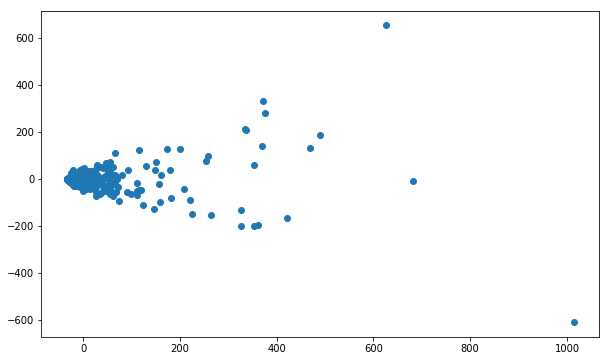

In [5]:
cs1.pmi_plot.show(annotate=False)

Inspections of the PPMI plots and results show that the count adjustments create strange results. The raw data performs better. This perhaps makes sense, since the raw data is not really raw data, but has already been pre-processed and is normalized ratios.

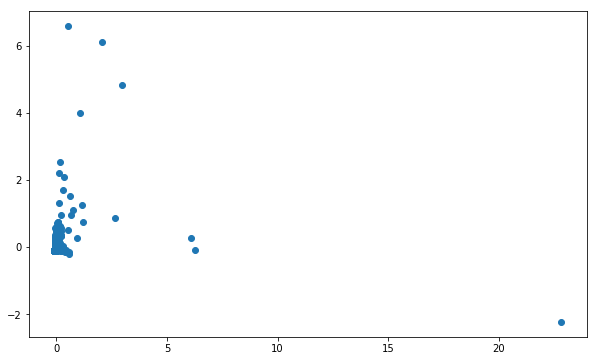

In [52]:
cs1.raw_plot.show(annotate=False)

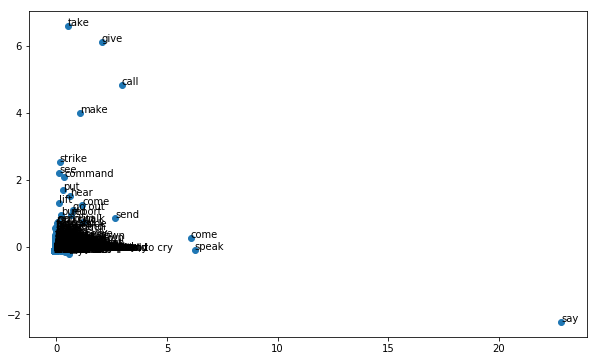

In [53]:
cs1.raw_plot.show()

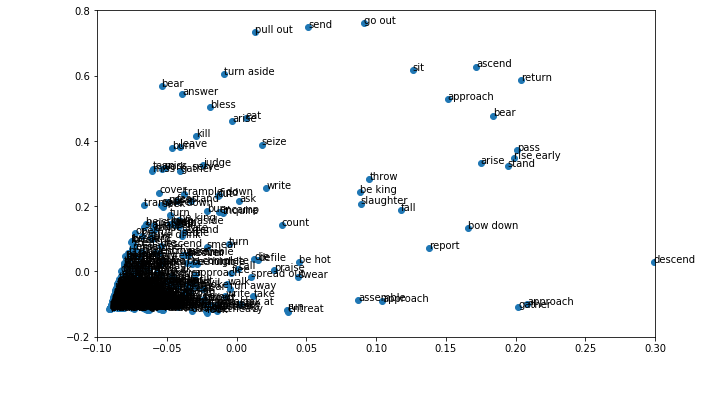

In [63]:
cs1.raw_plot.show(axis=[-0.1, 0.3, -0.2, 0.8])

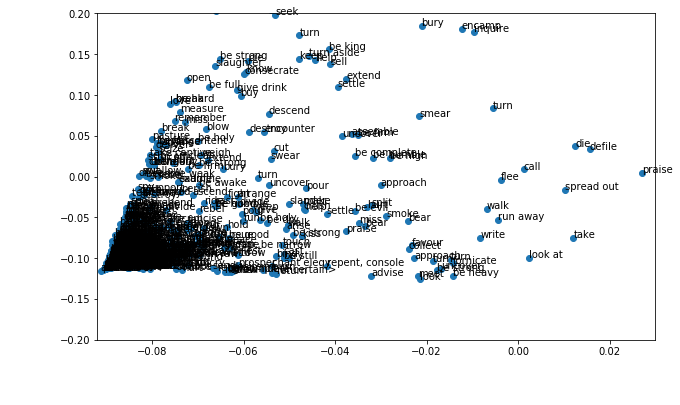

In [71]:
cs1.raw_plot.show(axis=[-0.092, 0.03, -0.2, 0.2])

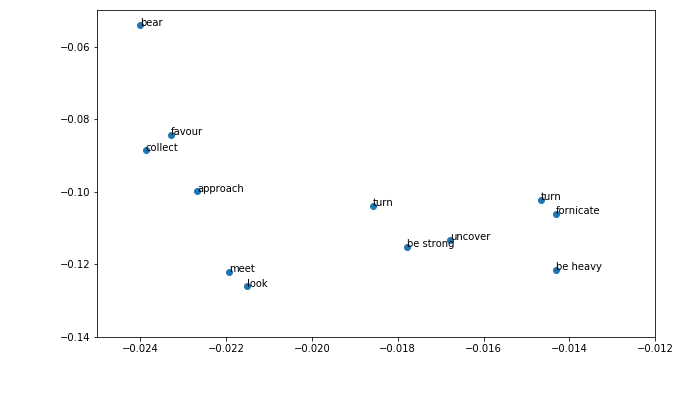

In [68]:
cs1.raw_plot.show(axis=[-0.025, -0.012, -0.14, -0.05])

In [ ]:
cs1.raw_plot.show(axis=[-0.1, 0.03, -0.2, 0.2])

In [47]:
cs1.similarity_raw['>MR[.qal (say)'].sort_values(ascending=False).head(10)

>MR[.qal (say)         1.000000
DBR[.piel (speak)      0.824788
NGC[.qal (approach)    0.709331
JD<[.hit (know)        0.649160
HSH[.hif (be still)    0.634489
>SP[.nif (gather)      0.618801
PLL[.hit (pray)        0.592026
BW>[.qal (come)        0.591835
CLX[.qal (send)        0.585538
QRH[.nif (meet)        0.571270
Name: >MR[.qal (say), dtype: float64

In [48]:
cs1.similarity_raw['<FH[.qal (make)'].sort_values(ascending=False).head(10)

<FH[.qal (make)          1.000000
XBR[.piel (be united)    0.388899
PCV[.hif (strip off)     0.370926
KBH[.piel (go out)       0.341888
NTN[.qal (give)          0.334878
CMR[.qal (keep)          0.331861
NGD[.hif (report)        0.327086
CBR[.piel (break)        0.327044
XDC[.piel (be new)       0.316867
BW>[.hif (come)          0.316827
Name: <FH[.qal (make), dtype: float64

In [72]:
cs1.similarity_raw['>KL[.qal (eat)'].sort_values(ascending=False).head(10)

>KL[.qal (eat)           1.000000
CXT[.hif (destroy)       0.402189
CBT[.qal (cease)         0.395644
KWL[.hif (comprehend)    0.366032
PCV[.hif (strip off)     0.347868
MNH[.qal (count)         0.344686
NGF[.qal (drive)         0.330993
LWN[.nif (murmur)        0.311017
NTK[.hif (pour)          0.304349
LQX[.qal (take)          0.284618
Name: >KL[.qal (eat), dtype: float64

In [104]:
cs1.similarity_raw['NTN[.qal (give)'].sort_values(ascending=False).head(10)

NTN[.qal (give)            1.000000
NGD[.hif (report)          0.466319
NGF[.qal (drive)           0.444959
MNH[.qal (count)           0.433092
NTK[.hif (pour)            0.413529
NGD[.hof (report)          0.389489
BW>[.hif (come)            0.389440
LQX[.qal (take)            0.386166
CBH[.qal (take captive)    0.377061
PCV[.hif (strip off)       0.372476
Name: NTN[.qal (give), dtype: float64

In [76]:
cs1.similarity_raw['R>H[.qal (see)'].sort_values(ascending=False).head(10)

R>H[.qal (see)                 1.000000
NCK[.qal (bite)                0.510237
NGF[.qal (drive)               0.493429
RP>[.qal (heal)                0.486377
GLH[.piel (uncover)            0.484053
KBD[.piel (be heavy)           0.481522
MNH[.qal (count)               0.479782
N>P[.piel (commit adultery)    0.479139
SWT[.hif (incite)              0.477065
YWH[.piel (command)            0.454138
Name: R>H[.qal (see), dtype: float64

In [77]:
cs1.similarity_raw['JD<[.qal (know)'].sort_values(ascending=False).head(10)

JD<[.qal (know)                1.000000
ZKR[.qal (remember)            0.532129
SPR[.piel (count)              0.511359
N>P[.piel (commit adultery)    0.424056
>HB[.qal (love)                0.398357
NCK[.qal (bite)                0.386761
DRC[.qal (inquire)             0.377828
YWH[.piel (command)            0.366453
SWT[.hif (incite)              0.347849
XZH[.qal (see)                 0.346937
Name: JD<[.qal (know), dtype: float64

In [78]:
cs1.similarity_raw['MWT[.qal (die)'].sort_values(ascending=False).head(10)

MWT[.qal (die)         1.000000
XTR[.qal (dig)         0.263269
LKD[.nif (seize)       0.236703
XL>[.qal (fall ill)    0.215137
QCR[.hit (tie)         0.208755
BQ<[.nif (split)       0.203686
<FH[.nif (make)        0.196736
QWM[.hof (arise)       0.190749
LQX[.nif (take)        0.184732
XRB[.qal (be dry)      0.174422
Name: MWT[.qal (die), dtype: float64

There are too many quirky results in here. I need to limit the similar terms to those that occur in an identical pattern elsewhere.

In [83]:
cs1.similarity_raw['KRT[.qal (cut)'].sort_values(ascending=False).head(10)

KRT[.qal (cut)           1.000000
PRF[.qal (spread out)    0.372056
GD<[.piel (cut off)      0.371576
ZKR[.qal (remember)      0.337374
CB<[.hif (swear)         0.273131
QVP[.qal (pluck off)     0.268760
CMR[.qal (keep)          0.267974
<FH[.qal (make)          0.245824
NF>[.qal (lift)          0.193060
BW>[.hif (come)          0.189887
Name: KRT[.qal (cut), dtype: float64

In [90]:
cs1.similarity_raw['YWH[.piel (command)'].sort_values(ascending=False).head(10)

YWH[.piel (command)        1.000000
CPV[.qal (judge)           0.724894
SWT[.hif (incite)          0.698412
RP>[.qal (heal)            0.685492
T<B[.nif (be abhorrent)    0.675891
NCK[.qal (bite)            0.669158
XNV[.qal (embalm)          0.663910
KBD[.piel (be heavy)       0.645257
XV>[.hif (miss)            0.610137
JC<[.hif (help)            0.601411
Name: YWH[.piel (command), dtype: float64

In [91]:
cs1.similarity_raw['KBD[.piel (be heavy)'].sort_values(ascending=False).head(10)

KBD[.piel (be heavy)           1.000000
KL>[.qal (restrain)            0.700839
NCK[.qal (bite)                0.682570
YWH[.piel (command)            0.645257
SWT[.hif (incite)              0.642663
RP>[.qal (heal)                0.641519
XNV[.qal (embalm)              0.630041
JNQ[.hif (suck)                0.628082
N>P[.piel (commit adultery)    0.598650
XV>[.hif (miss)                0.588358
Name: KBD[.piel (be heavy), dtype: float64

In [96]:
cs1.similarity_raw['NGD[.hif (report)'].sort_values(ascending=False).head(10)

NGD[.hif (report)            1.000000
NGD[.hof (report)            0.798224
NCQ[.piel (kiss)             0.671892
SPR[.piel (count)            0.577326
XWH[.hsht (bow down)         0.569876
NDR[.qal (vow)               0.534630
NSK[.piel (pour)             0.534630
JDH[.hif (praise)            0.529548
KHN[.piel (act as priest)    0.492801
NCQ[.qal (kiss)              0.487705
Name: NGD[.hif (report), dtype: float64

In [103]:
cs1.raw['NGD[.hif'].sort_values(ascending=False).head(10)

Pred.Objc.>T_DBR/      0.618012
Pred.Time.<D_KN        0.456521
Pred.Time.MN_>Z        0.444299
Pred.Cmpl.L_DWD==/     0.434617
Pred.Cmpl.L_MLK/       0.338053
Pred.Cmpl.L_C>WL=/     0.312279
Pred.Cmpl.L_MCH=/      0.287575
Pred.Cmpl.<L_BGTN/     0.287457
Pred.Cmpl.L_>B/        0.280291
Pred.Cmpl.<L_>WDWT/    0.278491
Name: NGD[.hif, dtype: float64

In [101]:
cs1.raw['NCQ[.piel'].sort_values(ascending=False).head(10)

Pred.Cmpl.L_>X/      0.025696
Pred.Cmpl.L_BN/      0.024718
Pred.Cmpl.L_MCH=/    0.006462
Pred.Cmpl.L_<M/      0.006125
Pred.Cmpl.L_>JC/     0.005972
Pred.Cmpl.L_>CH/     0.005733
Pred.Cmpl.L_>B/      0.005728
Pred.Cmpl.L_MLK/     0.005578
Pred.Cmpl.L_FR/      0.005450
Pred.Cmpl.L_BT/      0.005347
Name: NCQ[.piel, dtype: float64

Note that נשק "kiss" and נגד "report" are rated similarly due to the `Pred.Cmpl.L_OBJ` construction. They share this attribute.

## Attempt Clustering

In [87]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.nan_to_num(cs1.pairwise_raw, 0))
cluster_1_count = kmeans.labels_[kmeans.labels_ == 0].shape[0]
cluster_2_count = kmeans.labels_[kmeans.labels_ == 1].shape[0]

print(f'cluster_1 size: {cluster_1_count} ({round(cluster_1_count / kmeans.labels_.shape[0], 3)})')
print(f'cluster_2 size: {cluster_2_count} ({round(cluster_2_count / kmeans.labels_.shape[0], 3)})')

cluster_1 size: 174 (0.219)
cluster_2 size: 620 (0.781)


In [88]:
cglossedmin = pd.DataFrame(kmeans.labels_, 
                           index=[f'{F.lex.v(ce1.target2lex[w])}.{F.vs.v(ce1.target2node[w])} -- {ce1.target2gloss[w]}' for w in cs1.raw.columns], 
                           columns=['cluster']).fillna(0)

clustmin = pd.DataFrame(kmeans.labels_, 
                        index=cs1.raw.columns, 
                        columns=['cluster']).fillna(0)

cglossedmin[cglossedmin.cluster == 0]

,cluster
"<BD[.qal -- work, serve",0
<FH[.qal -- make,0
<LH[.hif -- ascend,0
<NH[.qal -- answer,0
<QD[.qal -- bind,0
<QR[.piel -- root up,0
<WR=[.piel -- be blind,0
<WR[.hif -- be awake,0
<WR[.piel -- be awake,0
<YB[.piel -- hurt,0


In [89]:
cglossedmin[cglossedmin.cluster == 1]

,cluster
"<BD[.hif -- work, serve",1
<BR=[.hit -- be angry,1
<BR[.hif -- pass,1
<BR[.piel -- pass,1
<BR[.qal -- pass,1
<DR[.nif -- be missing,1
<FH[.nif -- make,1
<GB[.qal -- desire,1
<JV[.qal -- rebuke,1
<LH[.hof -- ascend,1


## Subject Only Space